# Setup and Load Data

**1.1 Install Dependencies and setup**

In [64]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [65]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohappyeyeballs                 2.3.5
aiohttp                          3.10.2
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.13
albumentations                   1.4.13
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.2
astropy-iers-data                0.2024.8.5.0.32.23
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread               

**1.2 Download the dataset from below**

[Download the dataset from Google Drive](https://drive.google.com/drive/folders/1zWFnDQt2xOoRCO4GqhhCw3B6s8pHFKq1?usp=drive_link)


In [66]:
import tensorflow as tf
import os

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
os.path.join('data','happy')

'data/happy'

In [70]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [71]:
len(gpus)

1

In [72]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

**1.2 Remove dodgy images**

In [73]:
import cv2
import imghdr
import zipfile
import matplotlib.pyplot as plt

In [74]:
# Adjust the path as required to point to your own Google Drive directory
data_dir = '/content/drive/MyDrive/Image Classifier/data'

*(Optional)*  The code below is to ensure that your path checks so that it can be worked with throughout the whole project

In [ ]:
# List the files in the directory
try:
    files = os.listdir(data_dir)
    print("Files in directory:", files)
except FileNotFoundError:
    print(f"Error: Directory {data_dir} not found.")

In [ ]:
# Adjust the path as required to point to your own Google Drive directory
os.listdir('/content/drive/MyDrive/Image Classifier/data')

In [75]:
def delete_small_files_and_zips(directory, min_size_kb):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            file_size_kb = os.path.getsize(file_path) / 1024
            if file_size_kb < min_size_kb or filename.endswith('.zip'):
                os.remove(file_path)
                print(f"Removed {file_path} ({file_size_kb:.2f} KB)")

# Call the function to delete files under 10KB and any ZIP files
delete_small_files_and_zips(data_dir, 10)


Removed /content/drive/MyDrive/Image Classifier/data/sadtest.jpg (7.95 KB)


In [76]:
def delete_small_files_recursively(directory, min_size_kb):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            file_path = os.path.join(root, filename)
            file_size_kb = os.path.getsize(file_path) / 1024
            if file_size_kb < min_size_kb:
                os.remove(file_path)
                print(f"Removed {file_path} ({file_size_kb:.2f} KB)")

# Call the function to delete small files recursively
delete_small_files_recursively(data_dir, 10)


In [77]:
def clean_dataset(directory):
    supported_formats = ['jpeg', 'jpg', 'png', 'bmp', 'gif']
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if imghdr.what(file_path) not in supported_formats:
                print(f"Removing unsupported or corrupted image: {file_path}")
                os.remove(file_path)

# Clean the dataset before loading
clean_dataset(data_dir)

In [78]:
#Listing contents
happy_dir = os.path.join(data_dir, 'happy')
happy_files = os.listdir(happy_dir)
print("Contents of 'happy' folder:")
for file in happy_files:
    print(file)

Contents of 'happy' folder:
image13.jpeg
image12.jpeg
image25.jpeg
image23.jpeg
image26.jpeg
image24.jpeg
image27.jpeg
image28.jpeg
image33.jpeg
image34.jpeg
image36.jpeg
image37.jpeg
image39.jpeg
image40.jpeg
image41.jpeg
image42.jpeg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
1000_F_257759165_m9yldegJvu8gPi8lOHDM0mwP8LejhmKK.jpg
happy-woman-in-nature-at-sunset.jpg
dv2051009.jpg
happy-people.png
gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg
happy-person.jpeg
very-happy-people.jpg
4239f3d51d092f69d529f372a37b4601.jpg
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg
360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg
360_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
360_F_230964014_ngHsPlPbY2MCa0enKBex6YLNdTB24pki.jpg
Happy.jpg
jumping_for_joy_for_3_kinds_of_happy_people.jpg
_happy_jumping_on_beach-40815.jpg
1920px-face-smile.svg_.png
aa-happy

In [79]:
sad_dir = os.path.join(data_dir, 'sad')
sad_files = os.listdir(sad_dir)
print("\nContents of 'sad' folder:")
for file in sad_files:
    print(file)


Contents of 'sad' folder:
sad-people-icon-2CCHXB2.jpg
1000_F_452957465_ZDlbGO5mwQ4LisGrusfhuFwYDG2by4lc.jpg
sadness.jpg
happy_sad.jpg
960x0.jpg
portrait-young-man-lonely-boring-sad-people-B2GTFD.jpg
solitude-fear-or-mental-health-problems-concept-depressed-sad-person-2B8CNH7.jpg
sad-people-vector-26812552.jpg
1000_F_584080922_GDrrJBOpwC2AOvbDIdPfPcxEF0RrTRgk.jpg
3293803510_e96c37cc3e_z1.jpg
1000_F_58495935_Nr9VzQljLyN3RKKhGDGxQDBEkqIeLzrZ.jpg
guy-2617866_640.jpg
16183182-0-image-a-14_1563398711227.jpg
7-Things-You-Should-Not-Say-to-a-Depressed-Friend-960x640.jpg
acc3a2af0c83d2771565a8a44dbb1b91.1000x1000x1.jpg
why-are-teens-depressed-510x340.jpg
5360f7e3f9a01bb1aa10654514442436.500x500x1.jpg
maxresdefault.jpg
kisspng-shoulder-product-5d1a1ca1992ff2.3181155215619923536275.jpg
hq720.jpg
360_F_214879726_9bSXn2uHEDM1dwurJeo9oijgaExkzY0z.jpg
jack-lucas-smith-Zxq0dvmRyIo-unsplash-1024x701.jpg
360_F_561995097_a0dHcJrC2lCdOj6CBp6xBeGYv0hCsMyM.jpg
kisspng-microphone-finger-shoulder-5d2edf40749

In [80]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [81]:
image_exts[0]

'jpeg'

In [82]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if top not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))



Issue with image /content/drive/MyDrive/Image Classifier/data/happy/image13.jpeg
Issue with image /content/drive/MyDrive/Image Classifier/data/happy/image12.jpeg
Issue with image /content/drive/MyDrive/Image Classifier/data/happy/image25.jpeg
Issue with image /content/drive/MyDrive/Image Classifier/data/happy/image23.jpeg
Issue with image /content/drive/MyDrive/Image Classifier/data/happy/image26.jpeg
Issue with image /content/drive/MyDrive/Image Classifier/data/happy/image24.jpeg
Issue with image /content/drive/MyDrive/Image Classifier/data/happy/image27.jpeg
Issue with image /content/drive/MyDrive/Image Classifier/data/happy/image28.jpeg
Issue with image /content/drive/MyDrive/Image Classifier/data/happy/image33.jpeg
Issue with image /content/drive/MyDrive/Image Classifier/data/happy/image34.jpeg
Issue with image /content/drive/MyDrive/Image Classifier/data/happy/image36.jpeg
Issue with image /content/drive/MyDrive/Image Classifier/data/happy/image37.jpeg
Issue with image /content/dr

In [83]:
#image_path = os.path.join('/content/drive/MyDrive/Image Classifier/data', 'happy', 'image12.jpeg')
#print(f"Image Path: {image_path}")

#img = cv2.imread(image_path)
#print(img)

In [84]:
# Checking if file directory exists for troubleshooting
print(os.path.exists(image_path))

True


In [85]:
print(os.listdir('/content/drive/MyDrive/Image Classifier/data/happy'))

['image13.jpeg', 'image12.jpeg', 'image25.jpeg', 'image23.jpeg', 'image26.jpeg', 'image24.jpeg', 'image27.jpeg', 'image28.jpeg', 'image33.jpeg', 'image34.jpeg', 'image36.jpeg', 'image37.jpeg', 'image39.jpeg', 'image40.jpeg', 'image41.jpeg', 'image42.jpeg', '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg', '1000_F_257759165_m9yldegJvu8gPi8lOHDM0mwP8LejhmKK.jpg', 'happy-woman-in-nature-at-sunset.jpg', 'dv2051009.jpg', 'happy-people.png', 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg', 'happy-person.jpeg', 'very-happy-people.jpg', '4239f3d51d092f69d529f372a37b4601.jpg', '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg', '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg', '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg', '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg', '360_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg', '360_F_230964014_ngHsPlPbY2MCa0enKBex6YLNdTB24pki.jpg', 'Happy.jpg', 'jumping_for_joy_for_3_kinds_of_happy_people.jpg

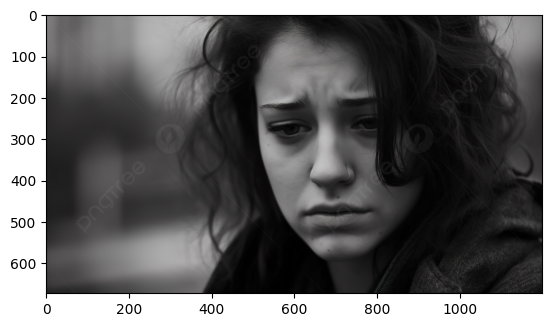

In [86]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Shows color too
plt.show() # Removes that weird line

**1.3 Load Data**



In [87]:
tf.data.Dataset??

In [88]:
import numpy as np

In [89]:
tf.keras.utils.image_dataset_from_directory??

In [90]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Image Classifier/data')

Found 171 files belonging to 2 classes.


In [91]:
def preprocess_image(image, label):
    try:
        image = tf.image.convert_image_dtype(image, tf.float32)
        return image, label
    except tf.errors.InvalidArgumentError as e:
        print(f"Skipping image due to error: {e}")
        return None, None

data = data.map(preprocess_image)
data = data.filter(lambda image, label: image is not None)


In [92]:
data_iterator = data.as_numpy_iterator()

In [93]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x79f9230ecac0>)

In [94]:
# Get another batch from iterator
batch = data_iterator.next()

In [95]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [96]:
# Class 1 = SAD PEOPLE
# Class 0 = HAPPY PEOPLE
batch[1]

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int32)

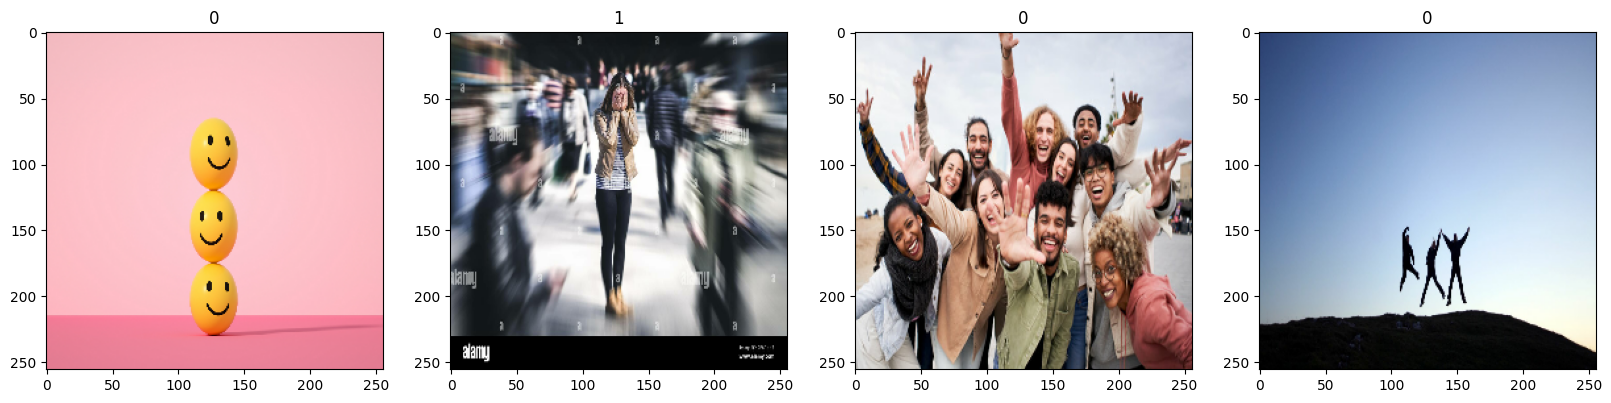

In [97]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


In [98]:
scaled = batch[0] / 255

In [99]:
scaled.max()

1.0

# 2. Preprocess Data

**2.1 Scale Data**

In [100]:
data = data.map(lambda x,y: (x/255, y))

In [101]:
scaled_iterator =data.as_numpy_iterator()

In [102]:
batch = scaled_iterator.next()

In [103]:
batch[0].max()
batch[0].min()

0.0

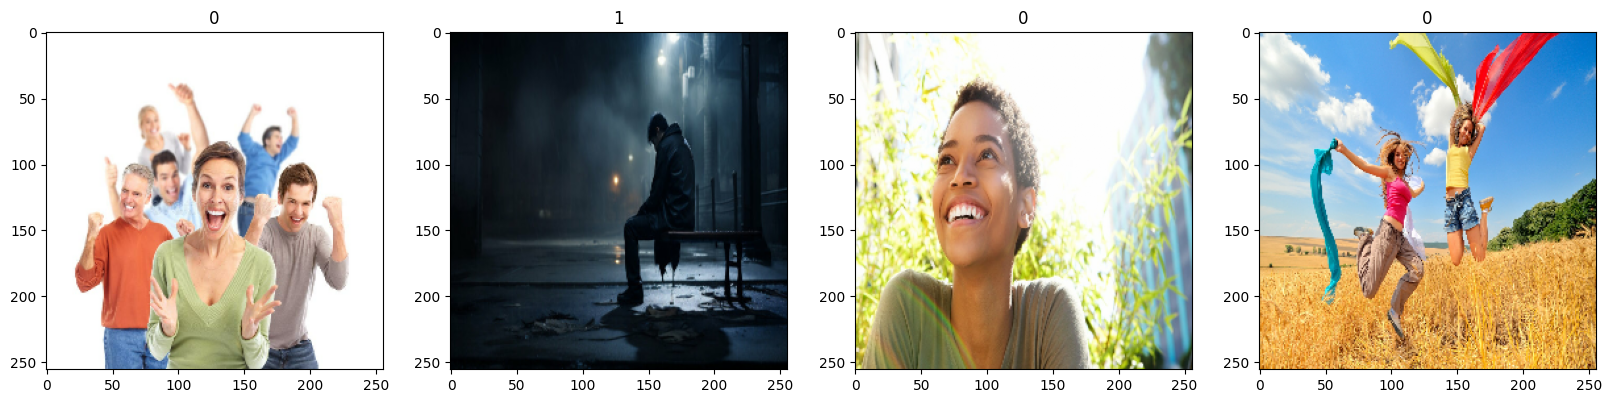

In [104]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])


**2.2 Split Data**

In [105]:
data_length = sum(1 for _ in data)
print(data_length)

6


In [106]:
train_size = int(0.7 * data_length)
val_size = int(0.2 * data_length)
test_size = data_length - train_size - val_size

In [107]:
# Ensure the sizes add up to the total length of the data
assert train_size + val_size + test_size == data_length

print(f"Train size: {train_size}, Validation size: {val_size}, Test size: {test_size}")

Train size: 4, Validation size: 1, Test size: 1


In [108]:
train_size + val_size + test_size

6

In [109]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

**3.1 Build Deep Learning Model**

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [111]:
model = Sequential()

In [112]:
MaxPooling2D??

In [113]:
# Adding our layers now
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [115]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

**3.2 Train**

In [116]:
logdir = '/content/drive/MyDrive/Image Classifier/logs'

In [117]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [118]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
      4/Unknown 12s 2s/step - accuracy: 0.6302 - loss: 1.1023

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.6104 - loss: 1.1543 - val_accuracy: 0.2500 - val_loss: 1.1624
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.4604 - loss: 0.8722 - val_accuracy: 0.5312 - val_loss: 0.6344
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6729 - loss: 0.5951 - val_accuracy: 0.5312 - val_loss: 0.5924
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6698 - loss: 0.5449 - val_accuracy: 0.7500 - val_loss: 0.4493
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8115 - loss: 0.5034 - val_accuracy: 0.7188 - val_loss: 0.4922
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 6s/step - accuracy: 0.7271 - loss: 0.4822 - val_accuracy: 0.7812 - val_loss: 0.4780
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.8406 - loss: 0.4077 - val_accuracy: 0.9062 - val_loss: 0.3171
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.8948 - loss: 0.3350 - val_accuracy: 0.9375 - val_loss: 0.2874
Epoch 9/20
4/4 ━━━━

In [119]:
hist.history

{'accuracy': [0.53125,
  0.515625,
  0.703125,
  0.625,
  0.828125,
  0.765625,
  0.8046875,
  0.8984375,
  0.9296875,
  0.7890625,
  0.9375,
  0.9375,
  0.9375,
  0.96875,
  0.953125,
  0.984375,
  0.96875,
  0.9921875,
  1.0,
  1.0],
 'loss': [1.3623056411743164,
  0.7819581627845764,
  0.6031268835067749,
  0.5612814426422119,
  0.4906291961669922,
  0.47277307510375977,
  0.40918368101119995,
  0.3169427514076233,
  0.19643524289131165,
  0.3564336895942688,
  0.26845675706863403,
  0.2657201588153839,
  0.17413726449012756,
  0.11546626687049866,
  0.12063518166542053,
  0.06819725036621094,
  0.0755266323685646,
  0.039712220430374146,
  0.024777844548225403,
  0.01135841105133295],
 'val_accuracy': [0.25,
  0.53125,
  0.53125,
  0.75,
  0.71875,
  0.78125,
  0.90625,
  0.9375,
  0.65625,
  0.9375,
  0.9375,
  0.90625,
  1.0,
  0.9375,
  0.96875,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.1624352931976318,
  0.6344032287597656,
  0.5924222469329834,
  0.4493468701839

**3.3 Plot Performance **

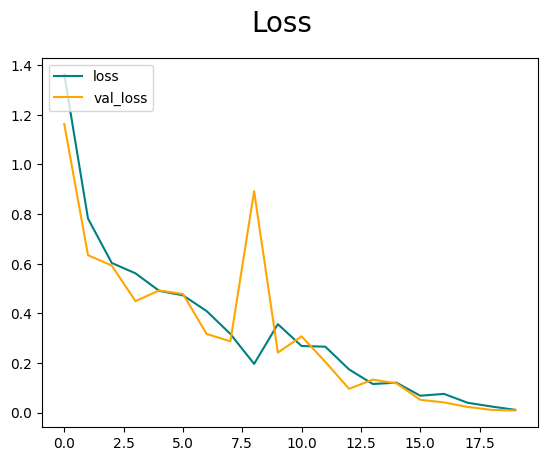

In [120]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

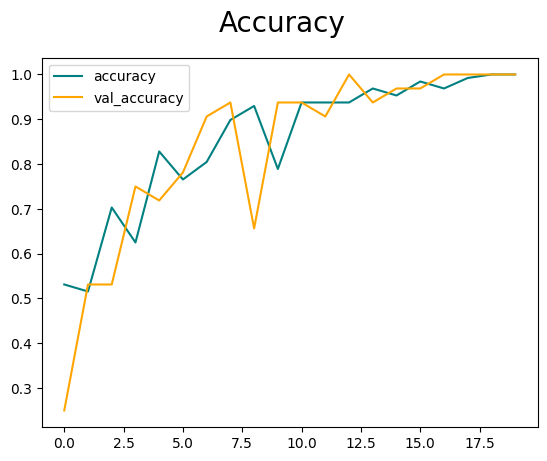

In [121]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

**4.1 Evaluate**

In [122]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
#

In [123]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [124]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


In [125]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


**4.2 Test**

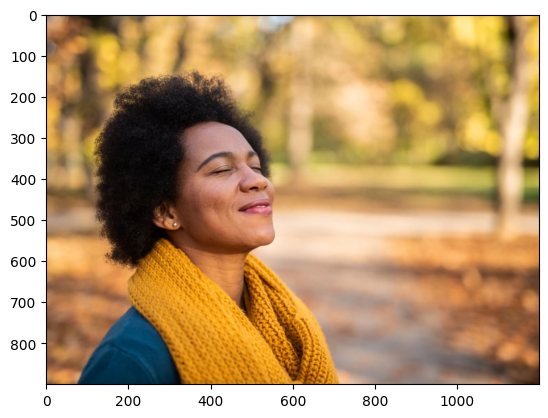

In [133]:
import cv2
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/Image Classifier/data/happytest.jpg' # Change images here for testing
img = cv2.imread(img_path)

if img is None:
    print(f"Error: Could not load image at '{img_path}'")
else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

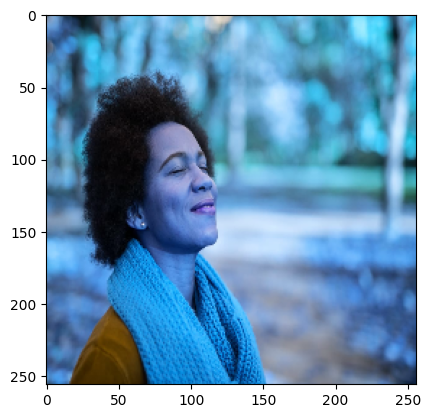

In [134]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [135]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [136]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


**Remember**:
1 = SAD
0 = HAPPY

In [137]:
yhat

array([[0.11098872]], dtype=float32)

In [138]:
if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Happy


# 5. Save the Model

**5.1 Save the Model**

In [141]:
from tensorflow.keras.models import load_model

In [139]:
model.save(os.path.join('/content/drive/MyDrive/Image Classifier/models', 'imageclassifier.h5'))

In [142]:
new_model = load_model(os.path.join('/content/drive/MyDrive/Image Classifier/models', 'imageclassifier.h5'))

In [144]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [145]:
if yhatnew > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Happy
